In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sreenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**PART 1: IMPLEMENTING THE MULTICLASS NAIVE BAYES MODEL ON DESCRIPTION**

**Text Preprocessing and Creation of Dataframes - Basic**

In [2]:
import re
import pandas as pd

class Basic:

    def create_traindf(csv_file):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Description']]

        # Preprocess the Description column (basic pre-processing)
        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize (split into words)
            tokens = text.split()
            return tokens
    
        # Apply preprocessing to the Description column
        df['Description'] = df['Description'].apply(preprocess_text)

        # Rename columns to match the required format
        df.rename(columns={'Class Index': 'Class Index', 'Description': 'Tokenized Description'}, inplace=True)

        return df
    
    def create_testdf(csv_file):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()

        # Preprocess the Description column
        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize (split into words)
            tokens = text.split()
            return tokens

        # Apply preprocessing to the Description column
        df['Description'] = df['Description'].apply(preprocess_text)

        # Add a Predicted column initialized to 0
        df['Predicted'] = 0

        # Rename columns for consistency
        df.rename(columns={'Description': 'Tokenized Description'}, inplace=True)

        return df, trueOutput


In [3]:
def calculate_accuracy(predicted_df, trueOutput):
    # Compare the Predicted column with the true class labels
    correct_predictions = (predicted_df['Predicted'] == trueOutput['Class Index']).sum()
    total_predictions = len(trueOutput)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

In [4]:
# Define the path to the training and test CSV files
csv_file_train = '../data/Q1/train.csv'  # Relative path from the notebook to the CSV file
csv_file_test = '../data/Q1/test.csv'  # Relative path from the notebook to the CSV file

In [5]:
# Preprocess the CSV file to create the required DataFrame
train_df = Basic.create_traindf(csv_file_train)
test_df, trueOutput = Basic.create_testdf(csv_file_test)
trainacc_df, trueOutput_train = Basic.create_testdf(csv_file_train)

# Display the first few rows of the processed DataFrame
# print(train_df.head())

**Naive Bayes Model**

(a) Training Naive Bayes and reporting test and train accuracy

In [6]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(train_df, smoothening=1.0)

# Calculate the train accuracy
nb.predict(trainacc_df)
train_accuracy = calculate_accuracy(trainacc_df, trueOutput_train)
print(f"Train Accuracy: {train_accuracy:.3f}%")

# Calculate the test accuracy
nb.predict(test_df)
test_accuracy = calculate_accuracy(test_df, trueOutput)
print(f"Test Accuracy: {test_accuracy:.3f}%")

Train Accuracy: 91.680%
Test Accuracy: 88.855%


(b) Word cloud construction for each class (done over the training data)

In [7]:
# Function for generating word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(df, class_col="Class Index", text_col="Tokenized Description", save_dir=None):
    # Aggregate tokens by class
    class_texts = df.groupby(class_col)[text_col].apply(lambda tokens: ' '.join([' '.join(token_list) for token_list in tokens]))

    # Generate and display/save word clouds for each class
    for cls, text in class_texts.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        if save_dir:
            # Save the word cloud as an image
            wordcloud.to_file(f"{save_dir}/wordcloud_class_{cls}.png")
        else:
            # Display the word cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"Word Cloud for Class {cls}", fontsize=16)
            plt.show()

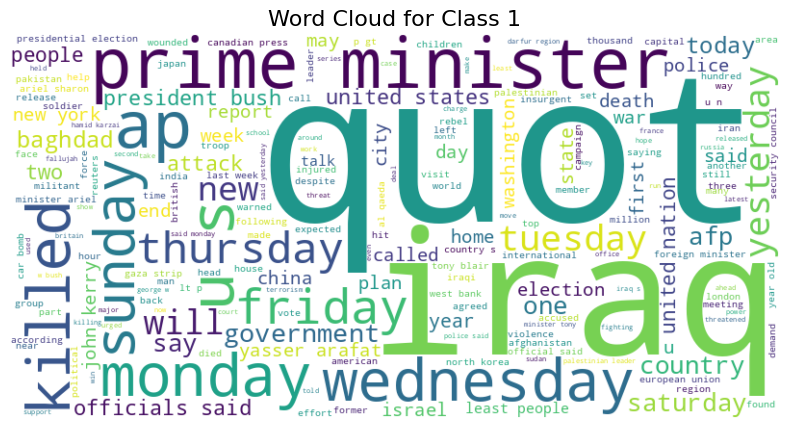

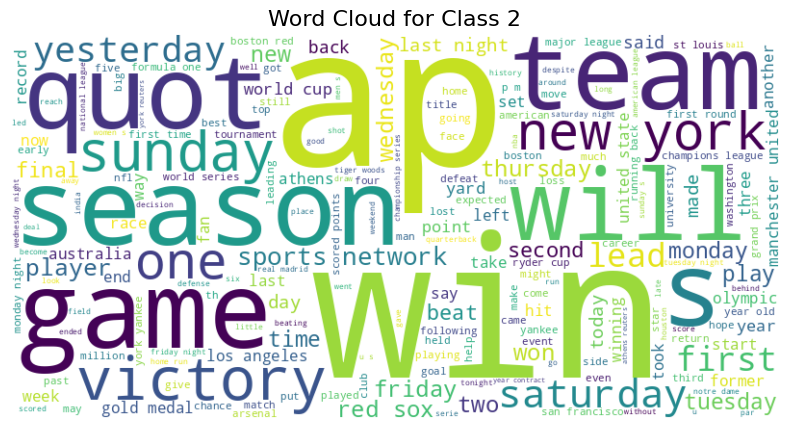

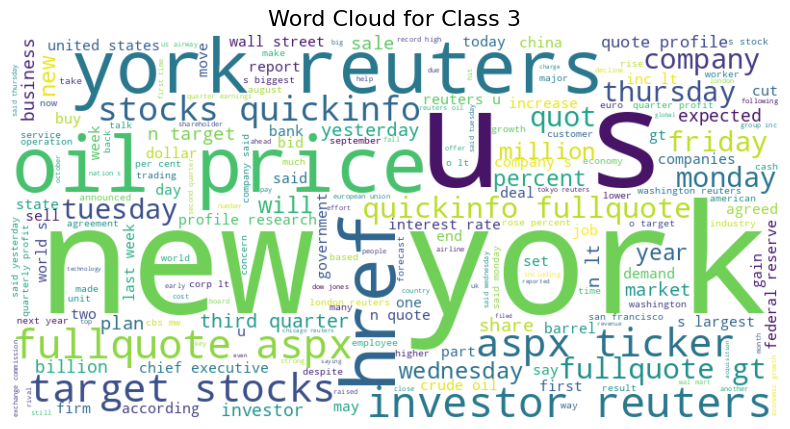

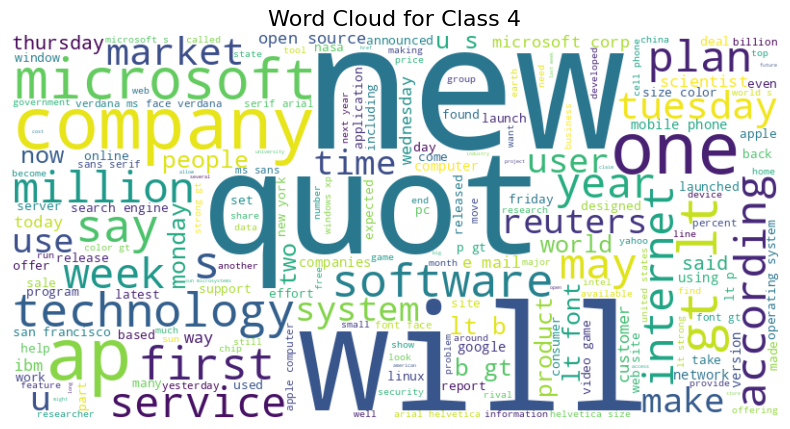

In [8]:
generate_word_clouds(train_df)

**PART 2: USING NLTK LIBRARY TO PRE-PROCESS TEXT**

In [9]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

class NLTK:
    def create_traindf(csv_file):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Description']]

        # Preprocess the Description column (basic pre-processing)
        def preprocess_text(text):
            stop_words = set(stopwords.words('english'))
            stemmer = PorterStemmer()
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize (split into words)
            tokens = text.split()
            tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            return tokens
    
        # Apply preprocessing to the Description column
        df['Description'] = df['Description'].apply(preprocess_text)

        # Rename columns to match the required format
        df.rename(columns={'Class Index': 'Class Index', 'Description': 'Tokenized Description'}, inplace=True)

        return df
    
    
    def create_testdf(csv_file):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()

        # Preprocess the Description column
        def preprocess_text(text):
            stop_words = set(stopwords.words('english'))
            stemmer = PorterStemmer()
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize (split into words)
            tokens = text.split()
            tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            return tokens

        # Apply preprocessing to the Description column
        df['Description'] = df['Description'].apply(preprocess_text)

        # Add a Predicted column initialized to 0
        df['Predicted'] = 0

        # Rename columns for consistency
        df.rename(columns={'Description': 'Tokenized Description'}, inplace=True)

        return df, trueOutput

In [10]:
# Preprocess the CSV file to create the required DataFrame
train_df_2 = NLTK.create_traindf(csv_file_train)
test_df_2, trueOutput_2 = NLTK.create_testdf(csv_file_test)
trainacc_df_2, trueOutput_train_2 = NLTK.create_testdf(csv_file_train)

In [11]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(train_df_2, smoothening=1.0)

# Calculate the train accuracy
nb.predict(trainacc_df_2)
train_accuracy_2 = calculate_accuracy(trainacc_df_2, trueOutput_train_2)
print(f"Train Accuracy: {train_accuracy_2:.3f}%")

# Calculate the test accuracy
nb.predict(test_df_2)
test_accuracy_2 = calculate_accuracy(test_df_2, trueOutput_2)
print(f"Test Accuracy: {test_accuracy_2:.3f}%")

Train Accuracy: 91.724%
Test Accuracy: 89.079%


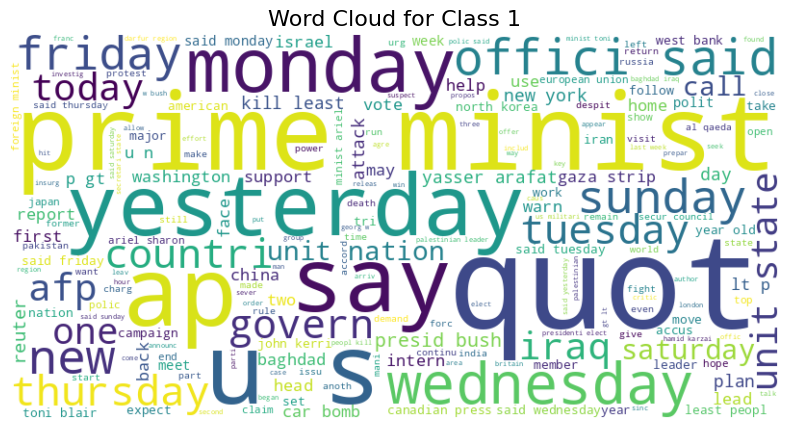

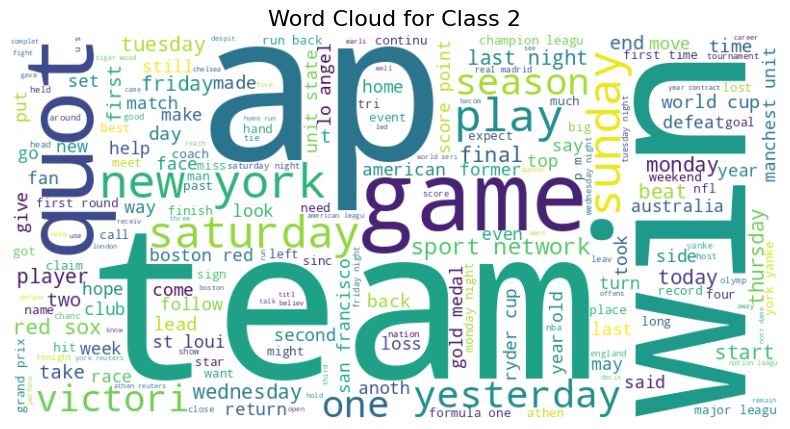

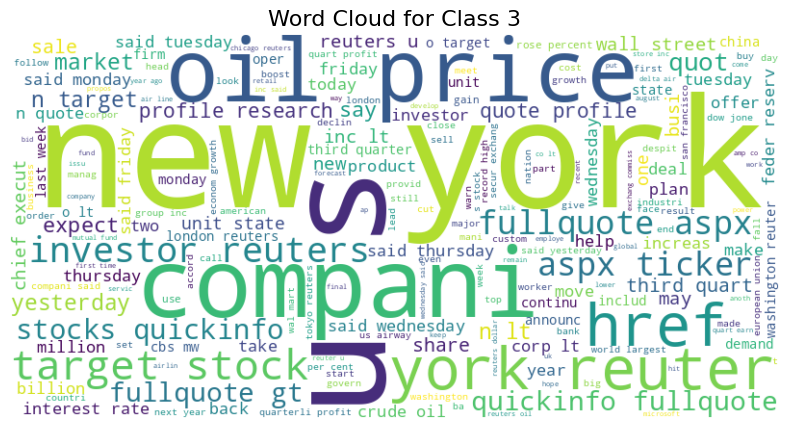

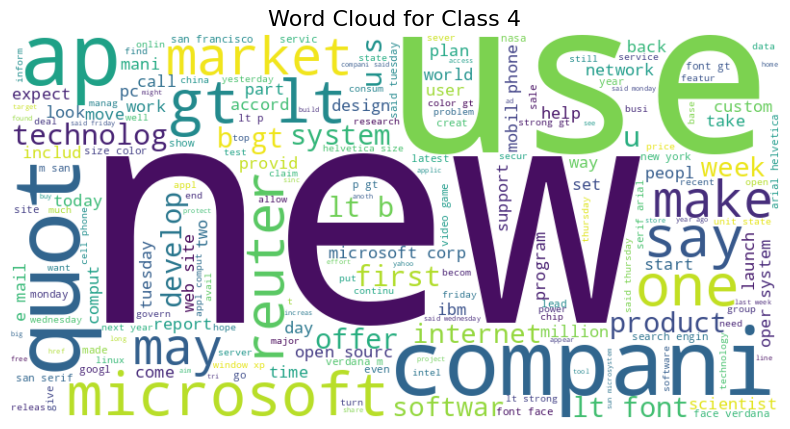

In [12]:
generate_word_clouds(train_df_2)

**PART 3: USING BI-GRAMS**

In [13]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import bigrams

class NLTK_Bigrams:
    def create_traindf(csv_file):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Description']]

        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize
            tokens = text.split()
            # Apply stemming and remove stopwords
            tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            # Generate bigrams
            bigram_tokens = list(bigrams(tokens))
            bigram_tokens = ['_'.join(bigram) for bigram in bigram_tokens]  # Convert tuples to strings
            # Combine unigrams and bigrams
            return tokens + bigram_tokens
        
        df['Tokenized Description'] = df['Description'].apply(preprocess_text)
        return df

    def create_testdf(csv_file):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()

        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize
            tokens = text.split()
            # Apply stemming and remove stopwords
            tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            # Generate bigrams
            bigram_tokens = list(bigrams(tokens))
            bigram_tokens = ['_'.join(bigram) for bigram in bigram_tokens]
            # Combine unigrams and bigrams
            return tokens + bigram_tokens

        df['Tokenized Description'] = df['Description'].apply(preprocess_text)
        df['Predicted'] = 0
        return df, trueOutput

In [14]:
# Preprocess the CSV file to create the required DataFrame
train_df_3 = NLTK_Bigrams.create_traindf(csv_file_train)
test_df_3, trueOutput_3 = NLTK_Bigrams.create_testdf(csv_file_test)
trainacc_df_3, trueOutput_train_3 = NLTK_Bigrams.create_testdf(csv_file_train)

In [15]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(train_df_3, smoothening=1.0)

# Calculate the train accuracy
nb.predict(trainacc_df_3)
train_accuracy_3 = calculate_accuracy(trainacc_df_3, trueOutput_train_3)
print(f"Train Accuracy: {train_accuracy_3:.3f}%")

# Calculate the test accuracy
nb.predict(test_df_3)
test_accuracy_3 = calculate_accuracy(test_df_3, trueOutput_3)
print(f"Test Accuracy: {test_accuracy_3:.3f}%")

Train Accuracy: 95.955%
Test Accuracy: 89.974%


**PART 4: BEST-OF-ALL**

In [16]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import bigrams

# General class keeping in mind all the pre-processing steps above
class General:
    def create_traindf(csv_file, remove_stop_words, apply_stemming, use_bigrams):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Description']]

        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize
            tokens = text.split()
            # Apply stemming and remove stopwords
            if remove_stop_words:
                tokens = [token for token in tokens if token not in stop_words]    
            if apply_stemming:
                tokens = [stemmer.stem(token) for token in tokens]
            # tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            if use_bigrams:
                # Generate bigrams
                bigram_tokens = list(bigrams(tokens))
                bigram_tokens = ['_'.join(bigram) for bigram in bigram_tokens]  # Convert tuples to strings
                # Combine unigrams and bigrams
                return tokens + bigram_tokens
            else:
                return tokens
        
        df['Tokenized Description'] = df['Description'].apply(preprocess_text)
        return df

    def create_testdf(csv_file, remove_stop_words, apply_stemming, use_bigrams):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()

        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

        def preprocess_text(text):
            # Remove punctuation and numbers
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)      # Remove numbers
            # Convert to lowercase
            text = text.lower()
            # Tokenize
            tokens = text.split()
            # Apply stemming and remove stopwords
            if remove_stop_words:
                tokens = [token for token in tokens if token not in stop_words]    
            if apply_stemming:
                tokens = [stemmer.stem(token) for token in tokens]
            # tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
            if use_bigrams:
                # Generate bigrams
                bigram_tokens = list(bigrams(tokens))
                bigram_tokens = ['_'.join(bigram) for bigram in bigram_tokens]  # Convert tuples to strings
                # Combine unigrams and bigrams
                return tokens + bigram_tokens
            else:
                return tokens

        df['Tokenized Description'] = df['Description'].apply(preprocess_text)
        df['Predicted'] = 0
        return df, trueOutput

In [17]:
# Helper functions to calculate the comparision matrices - get from the scikit-learn library
import pandas as pd
import itertools
from naive_bayes import NaiveBayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter combinations
param_combinations = list(itertools.product([False, True], repeat=3))  # 2^3 = 8

for i, (remove_stop_words, apply_stemming, use_bigrams) in enumerate(param_combinations):
    train_df_gen = General.create_traindf(csv_file_train, remove_stop_words, apply_stemming, use_bigrams)
    test_df_gen, trueOutput_test_gen = General.create_testdf(csv_file_test, remove_stop_words, apply_stemming, use_bigrams)
    trainacc_df_gen, trueOutput_train_gen = General.create_testdf(csv_file_train, remove_stop_words, apply_stemming, use_bigrams)

    nb = NaiveBayes()
    nb.fit(train_df_gen, smoothening=1.0)
    nb.predict(trainacc_df_gen) # Predictions on training data
    nb.predict(test_df_gen) # Predictions on test data

    results = []

    # Compute evaluation metrics
    metrics = {
        'Case': i,
        'Remove Stop Words': remove_stop_words,
        'Apply Stemming': apply_stemming,
        'Use Bigrams': use_bigrams,
        'Train Accuracy': accuracy_score(trueOutput_train_gen, trainacc_df_gen['Predicted']),
        'Test Accuracy': accuracy_score(trueOutput_test_gen, test_df_gen['Predicted']),
        'Test Precision': precision_score(trueOutput_test_gen, test_df_gen['Predicted'], average='weighted', zero_division=0),
        'Test Recall': recall_score(trueOutput_test_gen, test_df_gen['Predicted'], average='weighted', zero_division=0),
        'Test F1 Score': f1_score(trueOutput_test_gen, test_df_gen['Predicted'], average='weighted', zero_division=0)
    }
    
    results.append(metrics)

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    # Ensure all columns and rows are fully visible
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.max_rows', None)     # Show all rows (use with caution for large DataFrames)
    pd.set_option('display.max_colwidth', None) # Show full content of each cell
    pd.set_option('display.width', 1000)        # Increase the width of the display

    print(results_df)


   Case  Remove Stop Words  Apply Stemming  Use Bigrams  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1 Score
0     0              False           False        False          0.9168       0.888553        0.888156     0.888553       0.888239
   Case  Remove Stop Words  Apply Stemming  Use Bigrams  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1 Score
0     1              False           False         True         0.95025       0.895789        0.895505     0.895789       0.895544
   Case  Remove Stop Words  Apply Stemming  Use Bigrams  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1 Score
0     2              False            True        False        0.913183       0.888553        0.888259     0.888553       0.888341
   Case  Remove Stop Words  Apply Stemming  Use Bigrams  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1 Score
0     3              False            True         True        0.947967       0.894